# YOLO 

## YOLO v1
参考🔗：https://wvet00aj34c.feishu.cn/docx/U8STd5txXod1R5xhrrmcZh9fnTf


**目标检测的背景：**目标检测是计算机视觉中一项关键任务，应用于自动驾驶、安防监控、无人机导航和智能家居等领域。

主要解决2个问题：

1）**物体分类：**确定图像中物体的类别

2）**定位问题：**精确地找到每个物体的具体位置，通常用边界框表示


**YOLO(You Only Look Once):**讲目标检测视为一个单一的回归问题，通过一个卷积神经网络一次性完成图像中所有物体的检测任务。

特点如下：

1）实时性强：YOLO 的检测速度远远超过传统方法，基础版模型在NVIDIA Titan X GPU 上可以达到 45 FPS，快速版甚至可以达到 155 FPS。

2）全局感知能力：YOLO 使用整幅图像的信息进行检测，而不是局部特征，提高了检测的准确性。

3）高泛化性：在跨领域任务（如艺术图像）上，YOLO 表现出较强的泛化能力。


思想：
YOLOv1将目标检测问题作为回归问题。会将输入图像分成 $$S \times S$$ 的网格，如果一个物体的中心点落入到一个cell中，那么该cell就要负责预测该物体，一个格子只能预测一个物体，会生成两个预测框。
对于每个grid cell：
1. 预测B个边界框，每个框都有一个置信度分数（confidence score）这些框大小尺寸等等都随便，只有一个要求，就是生成框的中心点必须在grid cell里。
2. 每个边界框包含5个元素：(x,y,w,h)

  - x，y： 是指bounding box的预测框的中心坐标相较于该bounding box归属的grid cell左上角的偏移量，在0-1之间。
  在下图中，黄色虚线框代表grid cell，黄点表示该grid cell的左上角坐标，为（0，0）；红色和蓝色框代表该grid cell包含的两个bounding box，红点和蓝点表示这两个bounding box的中心坐标。有一点很重要，bounding box的中心坐标一定在该grid cell内部，因此，红点和蓝点的坐标可以归一化在0-1之间。在上图中，红点的坐标为（0.5，0.5），即x=y=0.5，蓝点的坐标为（0.9，0.9），即x=y=0.9。

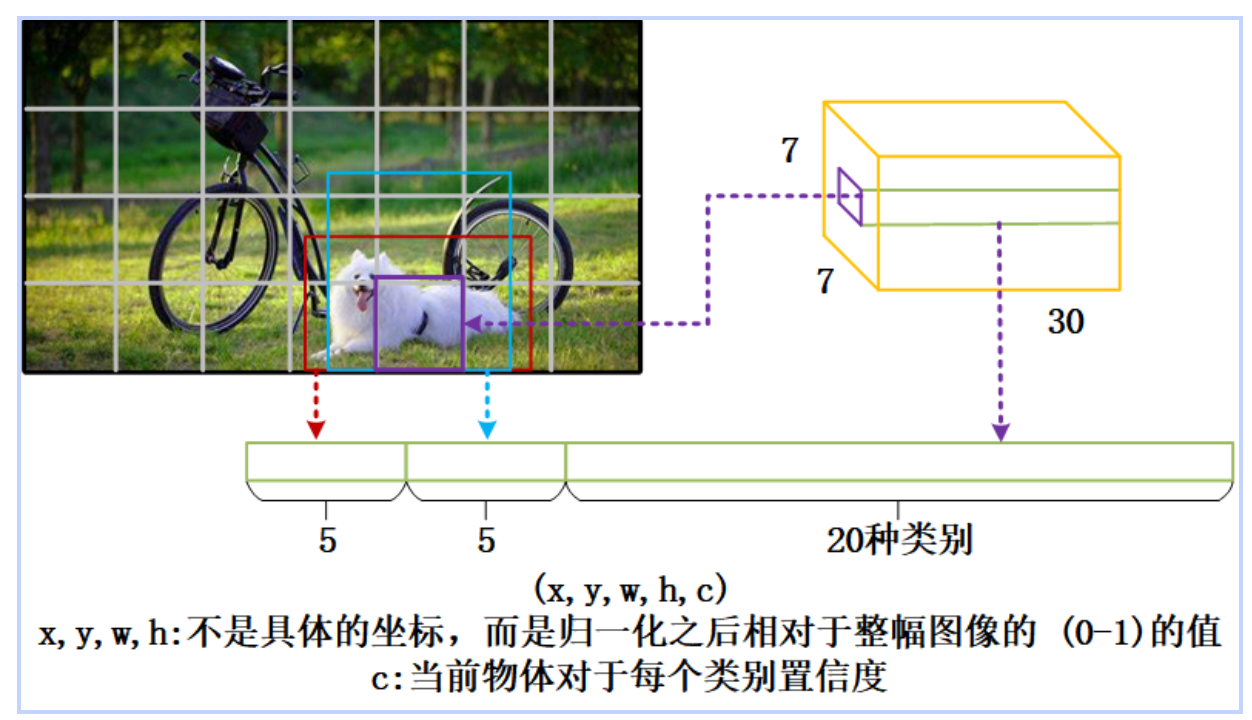

  - w，h： 是指该bounding box的宽和高，但也归一化到了0-1之间，表示相较于原始图像的宽和高（即448个像素）。比如该bounding box预测的框宽是44.8个像素，高也是44.8个像素，则w=0.1，h=0.1。如下图所示：红框的x=0.8，y=0.5，w=0.1，h=0.2。

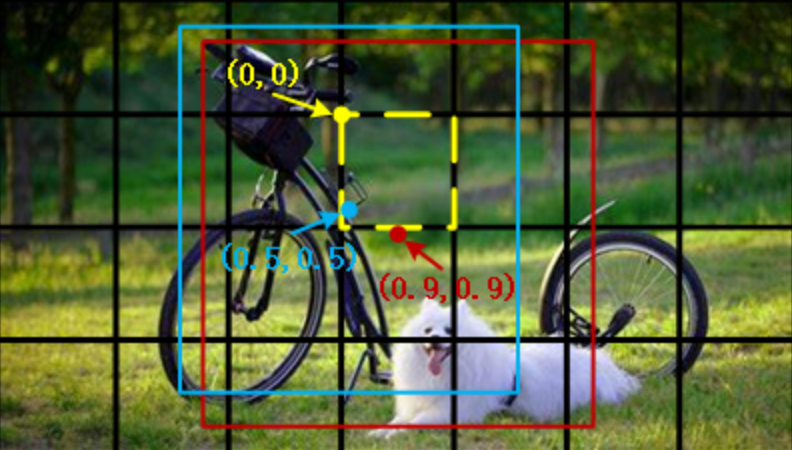

不管框 B 的数量是多少，只负责预测一个目标。

预测 C 个条件概率类别（物体属于每一种类别的可能性）

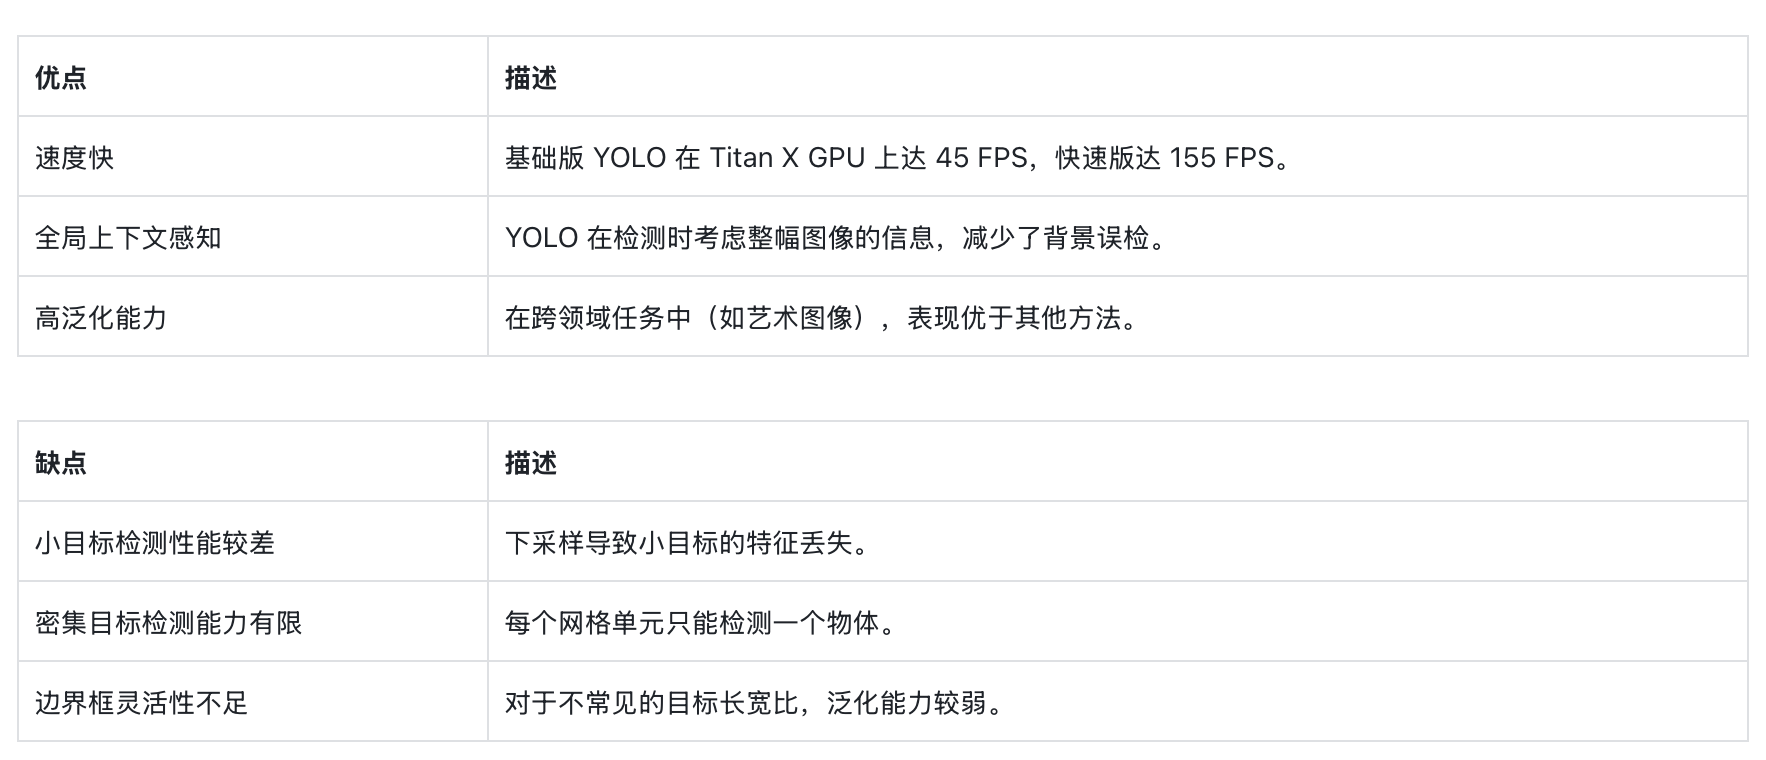

## YOLO 发展历程
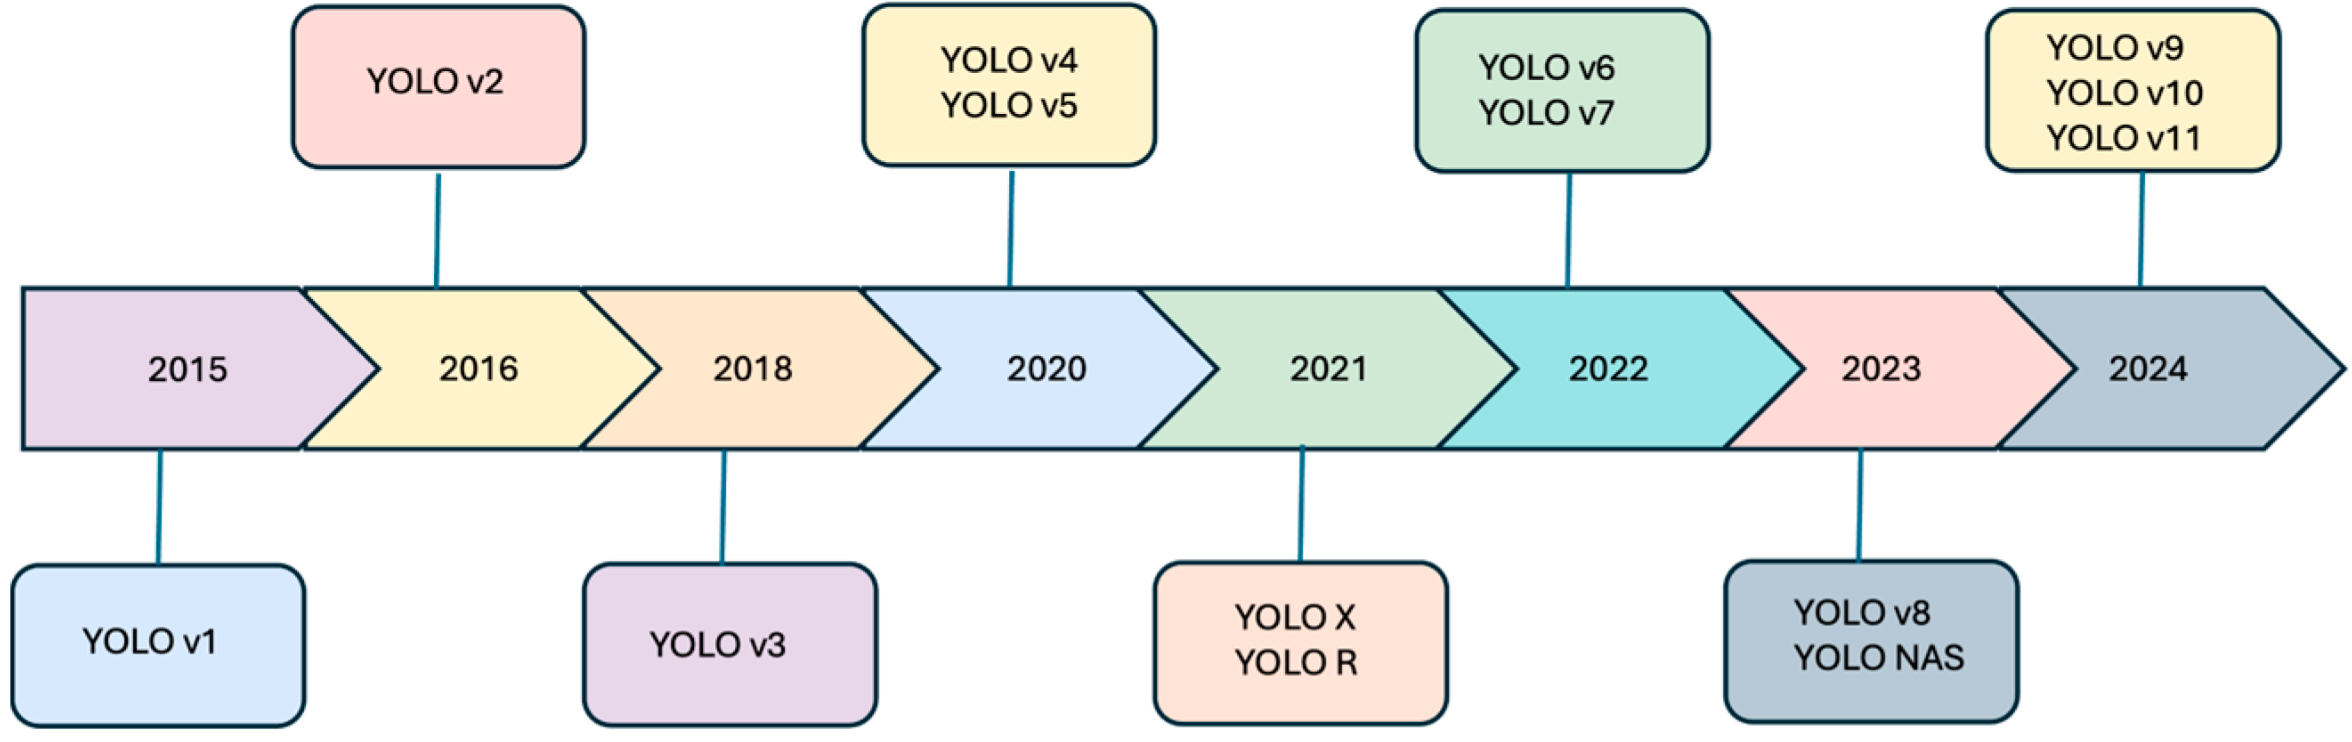

## YOLO 基本原理与网络结构

### YOLO 框架功能分块
1.骨干网络（backbone）
相当于一个"图像特征榨汁机"。它的任务是把一张图片"榨取"成浓缩的关键信息，比如形状、纹理、颜色等特征，就像把水果榨成汁一样，保留精华，去掉多余水分（无关背景）
假设你看到一张街景照片，Backbone会先分析：
- 第一层：提取边缘（比如车轮是圆的）
- 中间层：识别组件（比如车门、车窗）
- 深层：理解整体（这是一辆汽车）


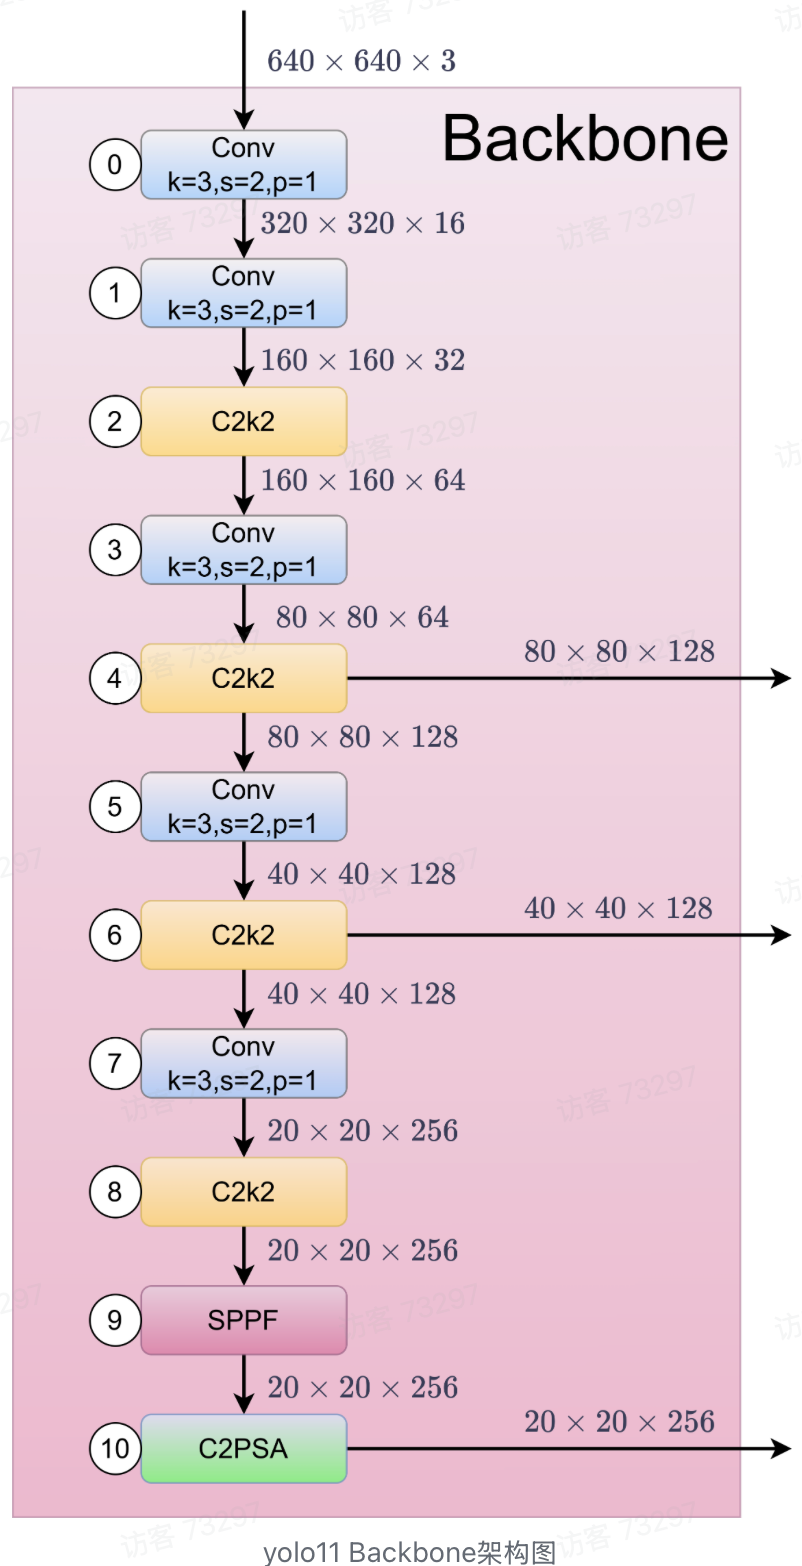




2.颈部网络（Neck）
它把Backbone榨出的不同浓度的"果汁"（大中小三种尺度的特征）混合调味，让网络既能看清细节（比如小目标），又能把握全局（比如大目标）。

关键操作：
- FPN（特征金字塔）：像叠蛋糕，把高层语义信息向下传递
- PAN（路径聚合）：反向叠蛋糕，把底层细节信息向上补充
→ 最终得到一杯"多层次风味特调果汁"


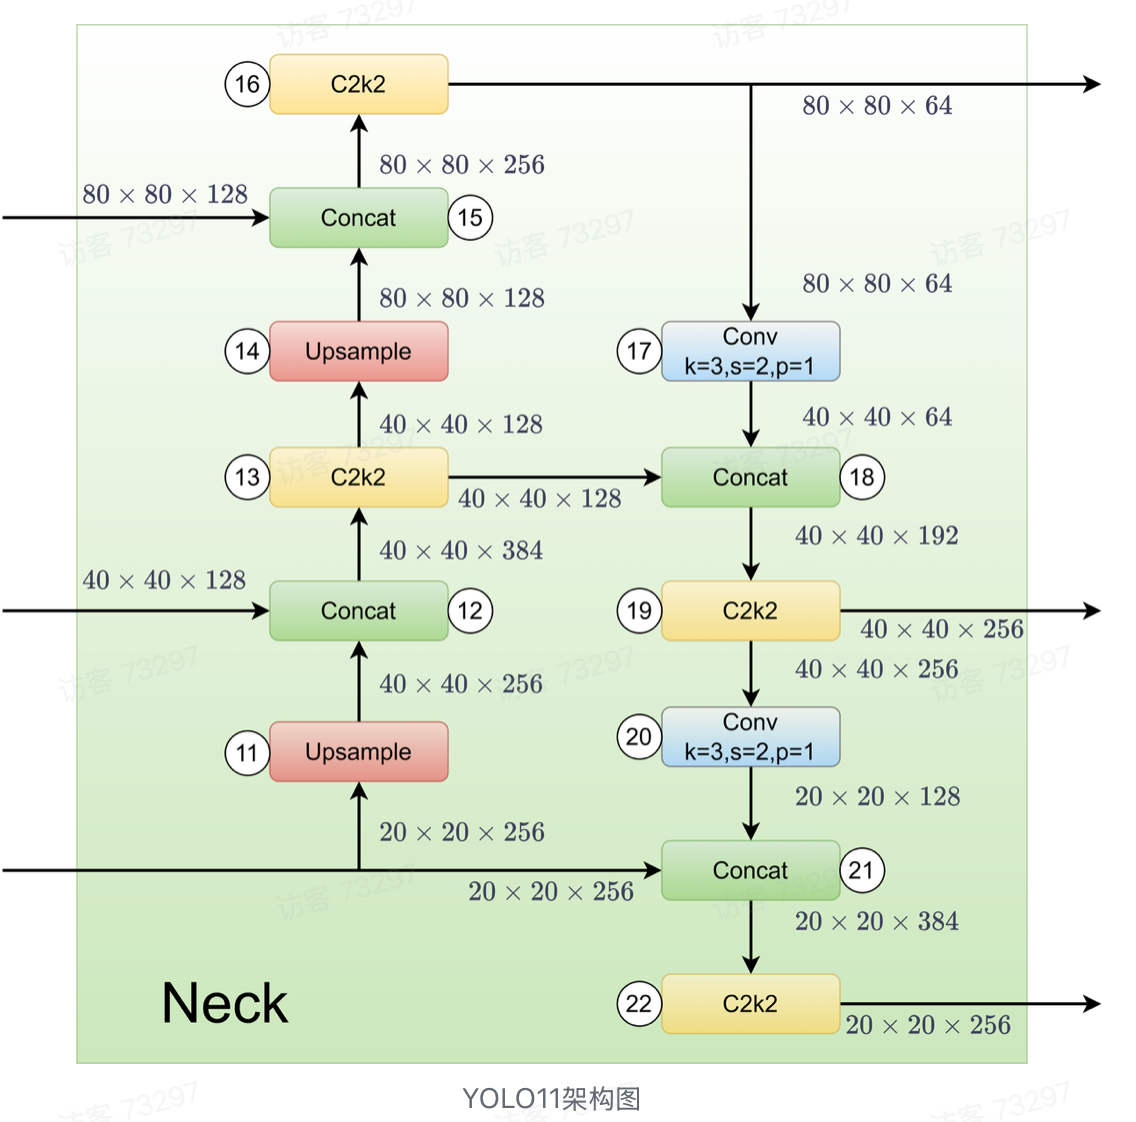

3.头部网络（Head）
关键操作：
- FPN（特征金字塔）：像叠蛋糕，把高层语义信息向下传递
- PAN（路径聚合）：反向叠蛋糕，把底层细节信息向上补充
→ 最终得到一杯"多层次风味特调果汁"


核心功能：
- 通过卷积层把特征图"翻译"成检测结果
- 每个网格预测多个候选框（Anchor boxes）
- 同时输出：坐标修正值 + 类别概率 + 置信度

## 一些关键概念

** “自上而下”，“自下而上”与特征融合 **  in Neck
自上而下
自上而下通常指高层特征通过上采样与低层特征融合，传递语义信息，增强细节定位能力。
- 应用版本：
  - YOLOv2：首次引入FPN（特征金字塔网络，Feature Pyramid Network），通过自上而下路径传递语义信息
  - YOLOv3：通过 FPN实现多尺度预测，其结构为单向自上而下的特征融合，高层特征上采样后与浅层特征拼接（Concat），生成多尺度检测层（3种尺度）
  - 高层特征上采样后与浅层特征拼接（Concat），生成多尺度检测层（3种尺度）
  - YOLOv3/v4/v5：结合FPN与SPP（空间金字塔池化），高层特征上采样后与低层拼接（Concat）。
  - YOLOv8：FPN与PAN（路径聚合网络）结合，保留更多位置信息，但可能忽略浅层特征
自下而上
自下而上则是低层特征下采样与高层融合，传递细节，提升语义信息丰富度。
- 应用版本：
  - YOLOv4：引入PANet，在FPN基础上增加自下而上路径，形成FPN+PAN的双向融合。
  - YOLOv5：低层特征下采样后与高层拼接，并通过横向连接（如相加操作）融合多尺度信息。

例如，YOLOv5中的自上而下路径是高层特征上采样后与低层拼接，自下而上则是低层下采样后与高层拼接。YOLOv4采用了PANet结构，结合了FPN（自上而下）和自下而上的增强结构，形成双向融合。


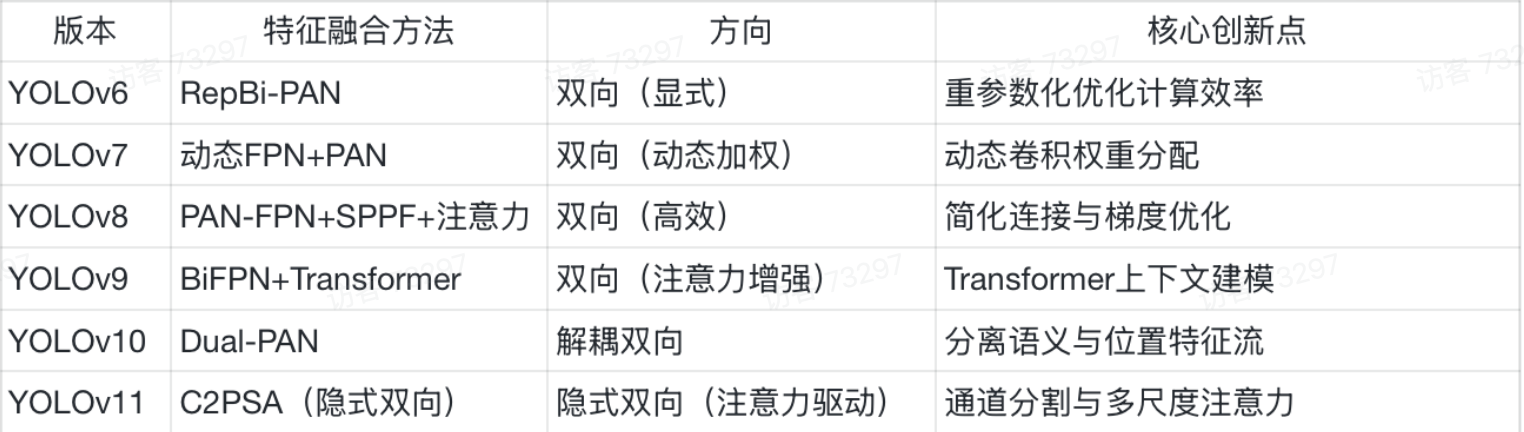